In [1]:
using Plotly
using Random: seed!

using Information
using Kraft
using Plot

using GSEA

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-16360809374772973735\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-15741940313325157498\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-16360809374772973735\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [2]:
use_style!()

seed!(20121020)

;

In [3]:
element_, element_score_, set_element_ = make_benchmark("random 8 0.1")

(["e1", "e2", "e3", "e4", "e5", "e6", "e7", "e8"], [0.00047713359395196164, 0.00047713359395196164, 0.5773372037780704, 0.5773372037780704, 1.0661429996217695, 1.0661429996217695, 1.3693528226626726, 1.3693528226626726], ["e2"])

In [4]:
layout = Layout(xaxis_title = "Element", xaxis_tickvals = 1:length(element_), xaxis_ticktext = element_)

;

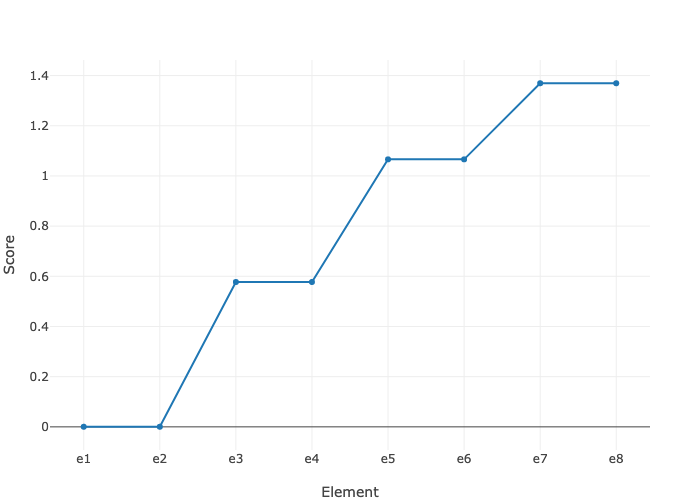

In [5]:
element_score_, element_ = sort_like((element_score_, element_))

plot_x_y((element_score_,); layout = merge(layout, Layout(yaxis_title = "Score")))

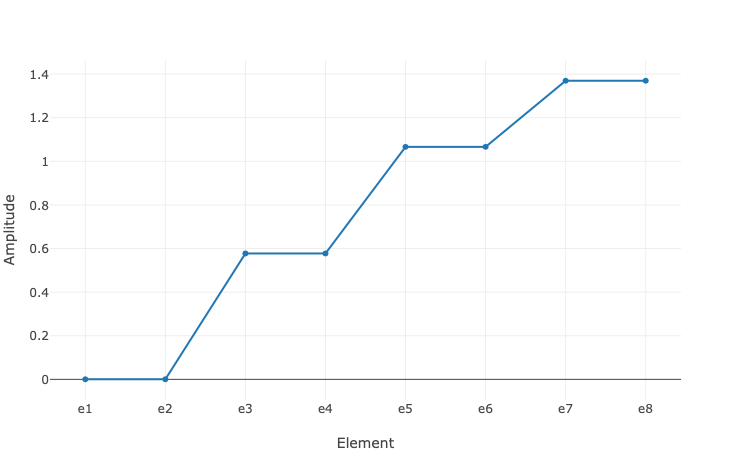

In [6]:
am_ = abs.(element_score_)

plot_x_y((am_,); layout = merge(layout, Layout(yaxis_title = "Amplitude")))

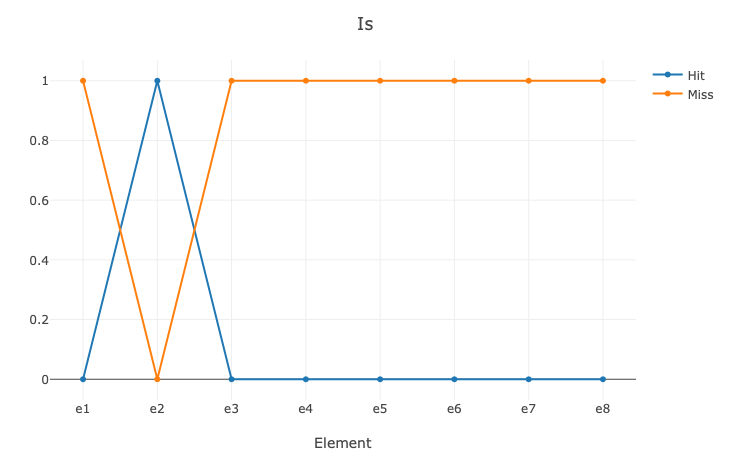

In [7]:
is_h_ = check_is(element_, set_element_)

is_m_ = 1.0 .- is_h_

plot_x_y((is_h_, is_m_); name_ = ("Hit", "Miss"), layout = merge(layout, Layout(title = "Is")))

In [8]:
small_number = eps()

2.220446049250313e-16

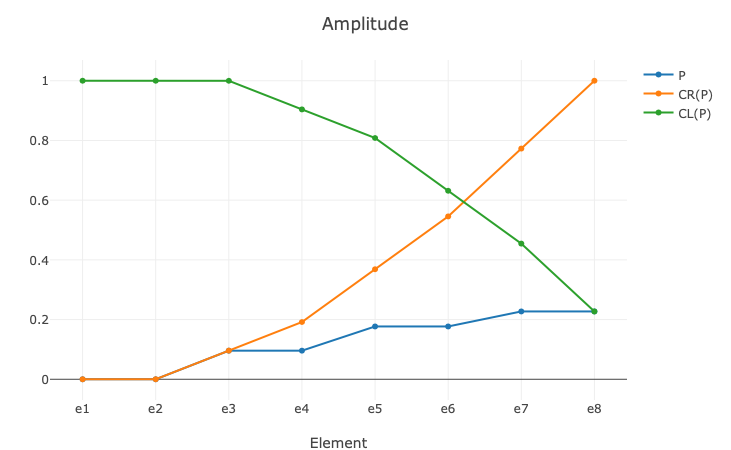

In [9]:
am_p_ = am_ / sum(am_)

am_p_cr_ = cumsum(am_p_) .+ small_number

am_p_cl_ = cumulate_sum_reverse(am_p_) .+ small_number

plot_x_y((am_p_, am_p_cr_, am_p_cl_); name_ = ("P", "CR(P)", "CL(P)"), layout = merge(layout, Layout(title = "Amplitude")))

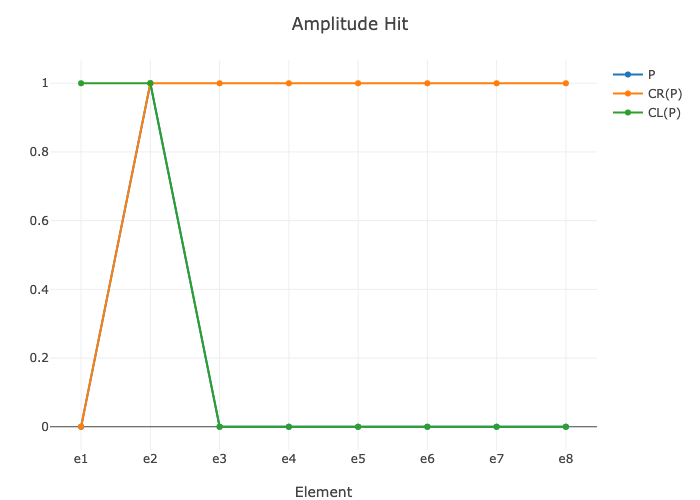

In [10]:
am_h_ = am_ .* is_h_

am_h_p_ = am_h_ / sum(am_h_)

am_h_p_cr_ = cumsum(am_h_p_) .+ small_number

am_h_p_cl_ = cumulate_sum_reverse(am_h_p_) .+ small_number

plot_x_y((am_h_p_, am_h_p_cr_, am_h_p_cl_); name_ = ("P", "CR(P)", "CL(P)"), layout = merge(layout, Layout(title = "Amplitude Hit")))

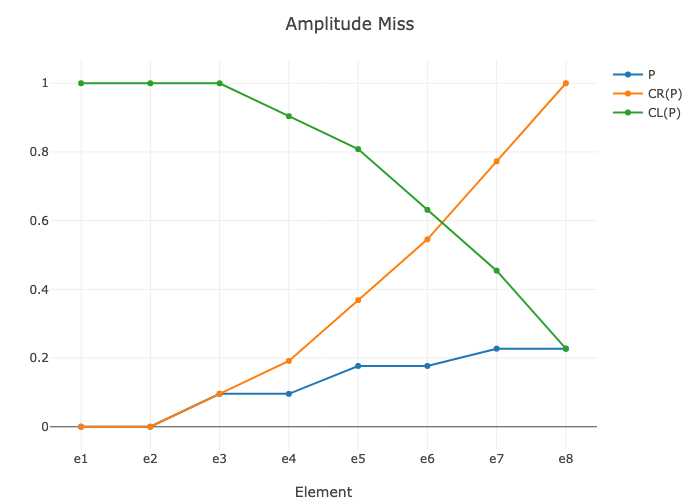

In [11]:
am_m_ = am_ .* is_m_

am_m_p_ = am_m_ / sum(am_m_)

am_m_p_cr_ = cumsum(am_m_p_) .+ small_number

am_m_p_cl_ = cumulate_sum_reverse(am_m_p_) .+ small_number

plot_x_y((am_m_p_, am_m_p_cr_, am_m_p_cl_); name_ = ("P", "CR(P)", "CL(P)"), layout = merge(layout, Layout(title = "Amplitude Miss")))

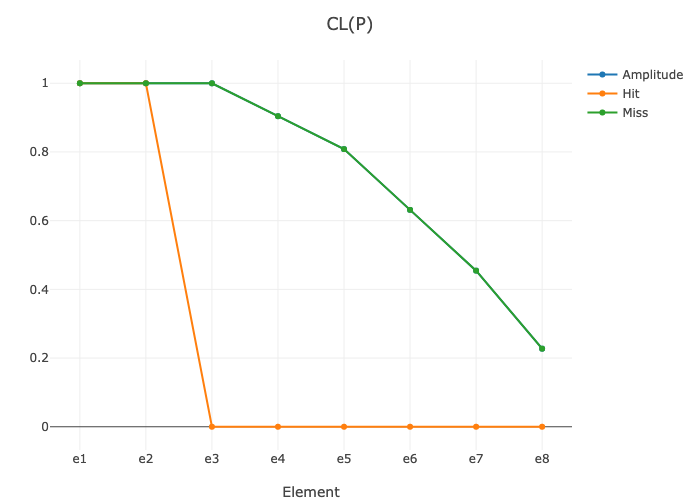

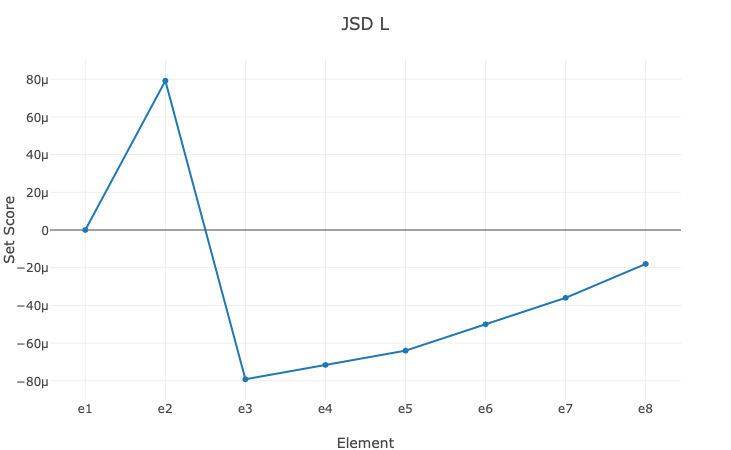

In [12]:
display(plot_x_y((am_p_cl_, am_h_p_cl_, am_m_p_cl_); name_ = ("Amplitude", "Hit", "Miss"), layout = merge(layout, Layout(title = "CL(P)"))))

jsd_l_ = compute_jsd(am_h_p_cl_, am_m_p_cl_, am_p_cl_)

plot_x_y((jsd_l_,); layout = merge(layout, Layout(title = "JSD L", yaxis_title = "Set Score")))

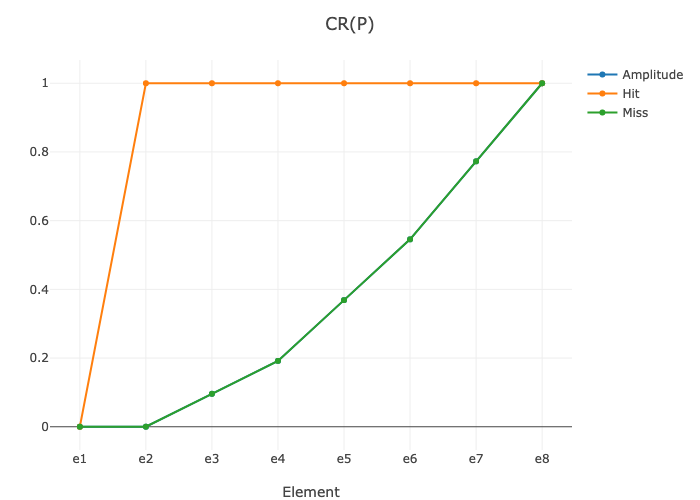

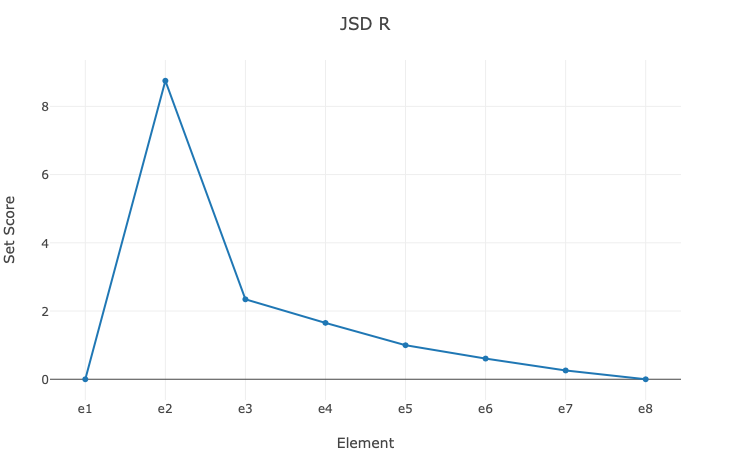

In [13]:
display(plot_x_y((am_p_cr_, am_h_p_cr_, am_m_p_cr_); name_ = ("Amplitude", "Hit", "Miss"), layout = merge(layout, Layout(title = "CR(P)"))))

jsd_r_ = compute_jsd(am_h_p_cr_, am_m_p_cr_, am_p_cr_)

plot_x_y((jsd_r_,); layout = merge(layout, Layout(title = "JSD R", yaxis_title = "Set Score")))

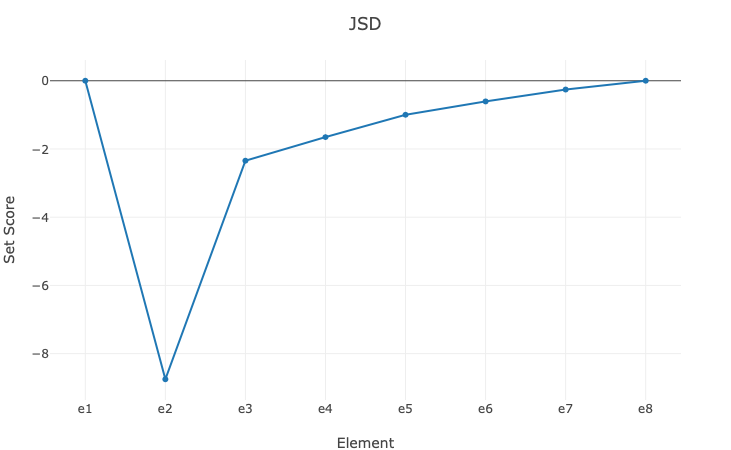

In [14]:
pk_ = jsd_l_ - jsd_r_

plot_x_y((pk_,); layout = merge(layout, Layout(title = "JSD", yaxis_title = "Set Score")))

In [15]:
set_score_ = pk_

mi = minimum(set_score_)

ma = maximum(set_score_)

if abs(mi) < abs(ma)

    extreme = ma

else

    extreme = mi

end

area = sum(set_score_)

set_score_, extreme, area

([6.2687985538604255e-9, -8.750728925263003, -2.344014359165567, -1.6516774394503255, -0.9979954284275795, -0.6060188192691446, -0.2578114464146765, -1.7991164359578808e-5], -8.750728925263003, -14.608264402885856)